# ImpDAR plot_power()  Tutorial

## Introduction

This Notebook shows how, after picking a layer in ice or snow radar data, you would go about verifying that you have picked a single line (and not a combination of multiple lines, meaning you would have to repick that layer). But first, what does it mean to *pick* a layer? Picking is the process of digitizing reflectors within the glacier or ice sheet. As electromagnetic waves are sent through ice or snow, part of that wave is reflected back towards us and can be measured by a receiver antenna. How quickly that electromagnetic wave travels through a given medium is controlled by its [permittivity](https://impdar.readthedocs.io/en/latest/bin/imppick.html). Each layer that you are seeing in a radargram is the result of permittivity contrasts between layers of different materials like ice, snow, firn, dust, and especially bedrock. Permittivity is heavily dependent on density and conductivity, and so you can clearly see the boundaries between ice-snow, ice-firn, and ice-bedrock where the permittivity changes..

While a pick's power can vary along its length, just as a layer in ice or snow data can vary in depth depending on the surface and bed topography, power should not change drastically. It should be smooth during transitions if it changes at all. If you want to learn more about the way ImpDAR digitizes reflectors, please see the documentation about the `imppick` library [here](https://impdar.readthedocs.io/en/latest/bin/imppick.html).

Let's take a look at what a picked line looks like when you load it in ImpDAR. As an example, we will use a line collected in early 2020 from Hercules Dome, Antarctica.

In [1]:
# We get annoying warnings about backends that are safe to ignore
import warnings
warnings.filterwarnings('ignore')

import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

import impdar
from impdar.lib import load
from impdar.lib import plot

In [2]:
#example matlab file name on disk
herc_mat_file = '../data/HDGridE_x53_migtk_picks.mat'

#load the hercules dome data, now an ImpDAR RadarData object
dat = load.load('mat', herc_mat_file)[0]

(<matplotlib.figure.Figure at 0x7f9b61f349e8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f9af4d477f0>)

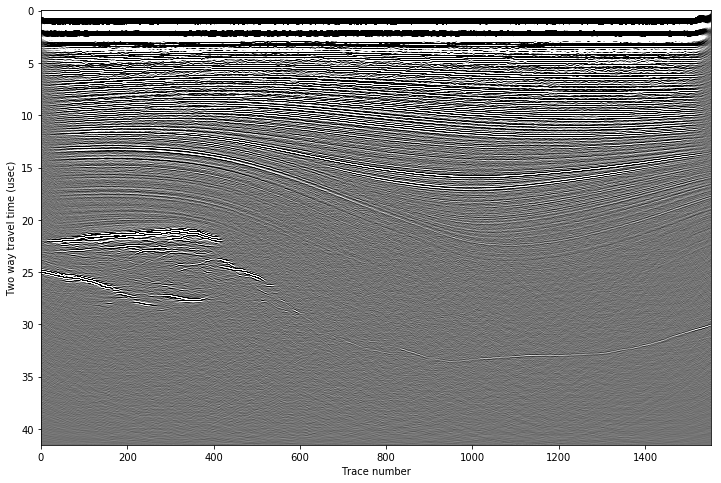

In [3]:
#let's inspect our data file
plot.plot_radargram(dat)

In [4]:
#we can inspect the RadarData attributes here
vars(dat)

{'chan': 2,
 'data': array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.16225441, 0.16770338, 0.16595683, ..., 0.01628703, 0.03562984,
         0.05136612],
        [0.08894336, 0.11456585, 0.13973841, ..., 0.06803717, 0.06350657,
         0.05522835],
        [0.00824118, 0.01671541, 0.02862275, ..., 0.02588058, 0.01798788,
         0.01172686]]),
 'decday': array([737454.07234843, 737454.07236893, 737454.07238942, ...,
        737454.10497516, 737454.1049937 , 737454.10501218]),
 'dt': 5e-09,
 'lat': array([-86.44000996, -86.43999383, -86.4399777 , ..., -86.41424587,
        -86.41422667, -86.41420724]),
 'long': array([252.85011635, 252.84942301, 252.84872966, ..., 251.78453531,
        251.78386739, 251.78320123]),
 'pressure'

When we load the data file in ImpDAR, we can access the picks and their corresponding indices with `dat.picks` and `dat.picks.picknums` respectively. `dat.picks.picknums` returns an array back to you with indices that you can use when specifying which picked layer you would like to plot with the `plot_power()` method.

In [5]:
dat.picks.picknums

[1, 2]

We can also inspect `dat.picks` with the `vars()` method. Otherwise, you will only get back:

In [6]:
dat.picks

In [7]:
vars(dat.picks)

{'samp1': array([[  nan,   nan,   nan, ...,   nan,   nan,   nan],
        [4892., 4892.,   nan, ..., 2711., 2709.,   nan]]),
 'samp2': array([[  nan,   nan,   nan, ...,   nan,   nan,   nan],
        [4925., 4925.,   nan, ..., 2731., 2728.,   nan]]),
 'samp3': array([[  nan,   nan,   nan, ...,   nan,   nan,   nan],
        [4941., 4944.,   nan, ..., 2749., 2746.,   nan]]),
 'time': array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]),
 'power': array([[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [22.82906175, 30.01928916,         nan, ..., 59.5785543 ,
         45.63542284,         nan]]),
 'picknums': [1, 2],
 'lasttrace': <impdar.lib.LastTrace.LastTrace at 0x7f9af4d47668>,
 'lt': <impdar.lib.LeaderTrailer.LeaderTrailer at 0x7f9af4d476a0>,
 'pickparams': <impdar.lib.PickParameters.PickParameters at 0x7f9af4d532b0>,
 'radardata': <impdar.lib.RadarData.RadarData at 0x7f9af4d474a8>,
 'lines': []}

## Plotting Picks

Now we are ready to plot the radargram along with the picks that we have previously saved. ImpDAR's `plot_radargram()` method was designed for this purpose. Note, that without the optional parameters, `plot_radargram()` behaves exactly like the `plot()` method.  However, now we can specify our x and y axis units as well as the colors that we would like to use to show our picked lines. Tthe default is magenta-green-magenta for the top, middle, and bottom of the wavelet used to pick lines, and this is what you will encounter in the GUI when you use the `immpick` command from the terminal.

(<matplotlib.figure.Figure at 0x7f9ae64c6ac8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f9ae646b0f0>)

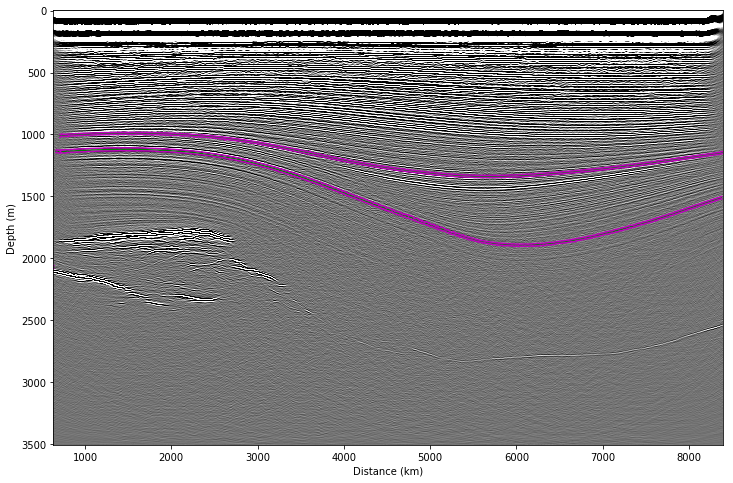

In [8]:
plot.plot_radargram(dat, xdat='dist', ydat='depth', pick_colors='mgm') 

## Calculating Power Across Picks
Now we are ready to plot the power of our pick to verify it. We can call the `plot_power()` method from a Jupyter Notebook:

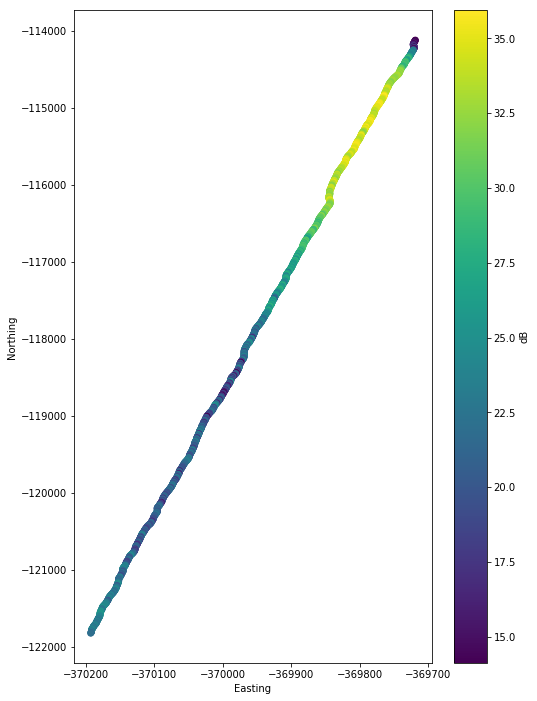

In [9]:
fig, ax = plot.plot_power(dat, 1)

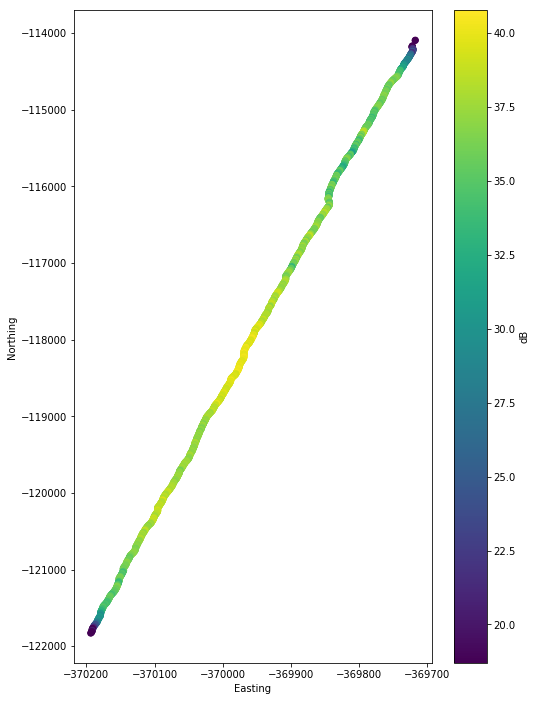

In [10]:
fig, ax = plot.plot_power(dat, 2)

If you wanted to run this method from the command line instead, you would use:

```python
impdar plot -power 1 HDGridE_x53_migtk_picks.mat

```

As you can see, our pick's power does not change drastically along its length. This gives us more confidence that we have correctly identified a single layer within the snow or ice data. Doing this for each and every pick in a radargram profile would be a time-consuming process. But checking important layers at different depths in a radargram's profile can help you quickly verify that you have isolated individual ice and snow layers.